In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:

r = requests.get("https://www.trendyol.com/erkek-pantolon-x-g2-c70?pi=13")
soup = BeautifulSoup(r.content,"lxml")

In [ ]:
import os
import requests
from urllib.parse import urljoin

def download_images(url, folder_path, num_images):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    image_tags = soup.find_all('img', class_='component-image', limit=num_images)

    for i, img_tag in enumerate(image_tags):
        img_url = img_tag.get('src')
        img_url = urljoin(url, img_url)

        response = requests.get(img_url)
        with open(os.path.join(folder_path, f'image_{i+1}.jpg'), 'wb') as f:
            f.write(response.content)

'''
There is no need to run the part up to here, because we have downloaded the database.

'''

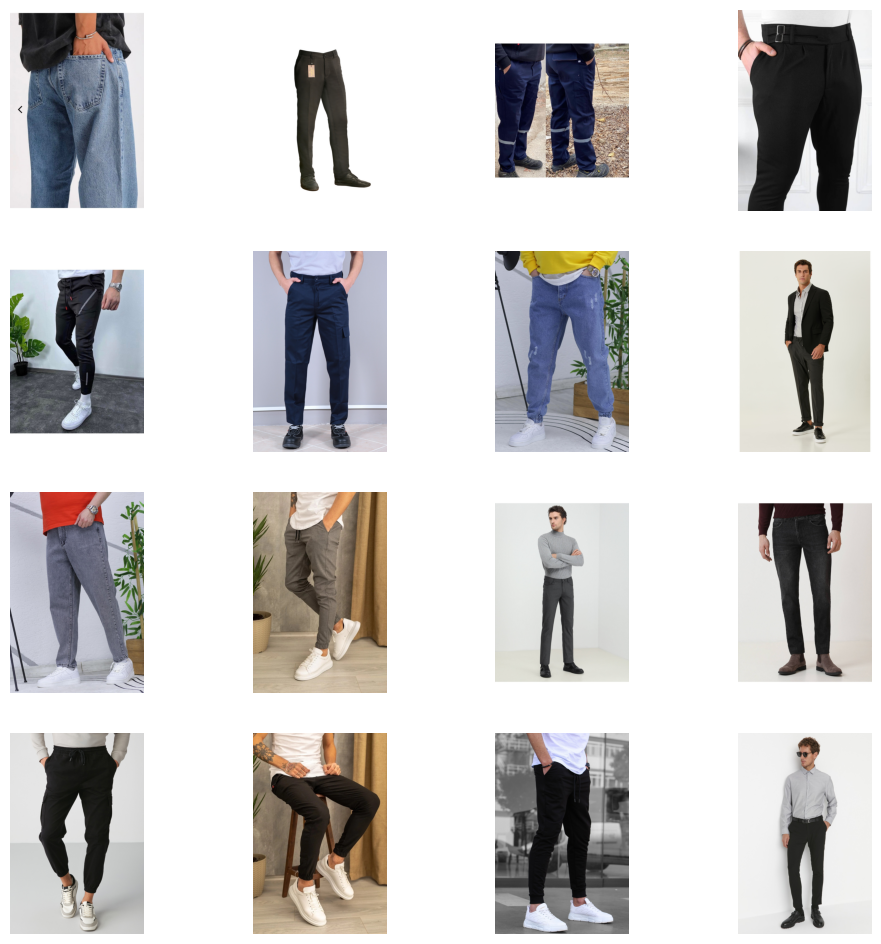

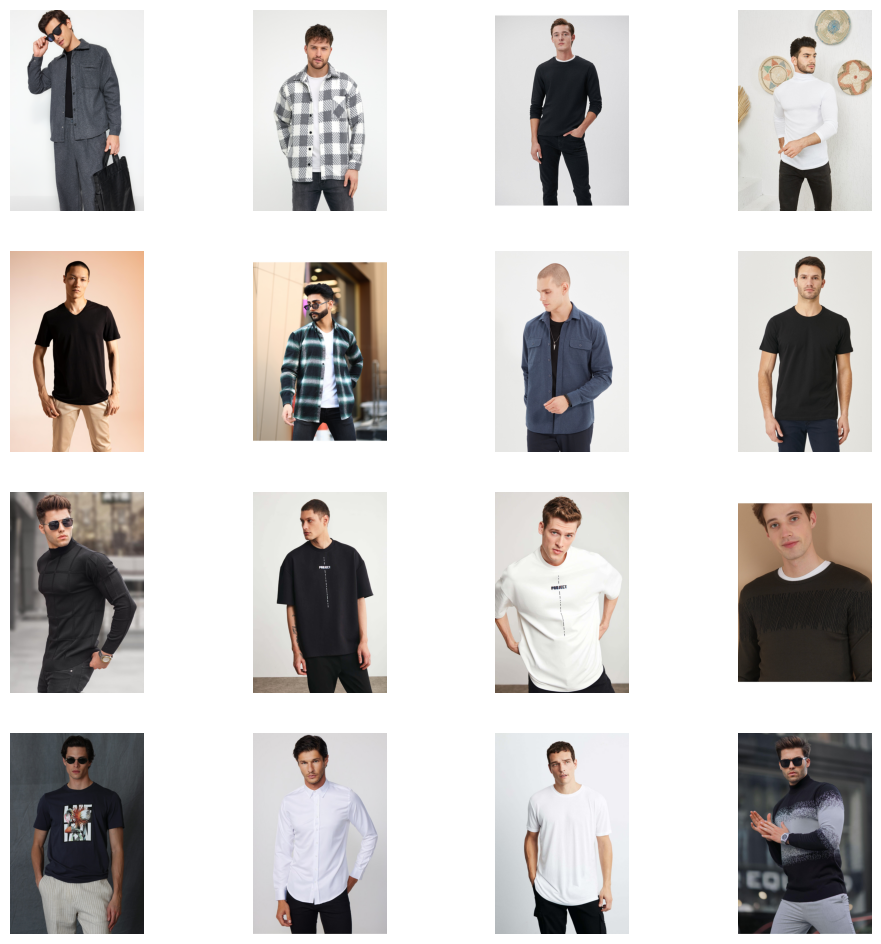

In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_random_images(folder_path, num_images):
    image_files = random.sample(os.listdir(folder_path), num_images)

    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    for i in range(4):
        for j in range(4):
            img_path = os.path.join(folder_path, image_files[i * 4 + j])
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')

    plt.show()

if __name__ == "__main__":
    pantolon_folder = 'database/p'
    tshirt_folder = 'database/t'

    show_random_images(pantolon_folder, num_images=16)
    show_random_images(tshirt_folder, num_images=16)

In [ ]:
import tkinter as tk
from tkinter import simpledialog
from PIL import Image, ImageTk
import random

In [ ]:
class FashionRatingApp:
    def __init__(self, master, pantolon_folder, tshirt_folder, num_combinations=20):
        self.master = master
        self.master.title("Kombin Puanlama Uygulamasi")

        self.pantolon_folder = pantolon_folder
        self.tshirt_folder = tshirt_folder
        self.num_combinations = num_combinations
        self.current_index = 0
        self.combination_puanlar = []

        self.combination_paths = self.get_random_combinations()
        self.canvas = tk.Canvas(master, width=300, height=300)
        self.canvas.pack()

        self.scale = tk.Scale(master, from_=0, to=10, orient=tk.HORIZONTAL, length=200)
        self.scale.pack()

        self.confirm_button = tk.Button(master, text="Onayla", command=self.confirm_rating, default=tk.ACTIVE)
        self.confirm_button.pack()

        self.show_combination()

    def get_random_combinations(self):
        pantolon_images = [os.path.join(self.pantolon_folder, img) for img in os.listdir(self.pantolon_folder)]
        tshirt_images = [os.path.join(self.tshirt_folder, img) for img in os.listdir(self.tshirt_folder)]

        random_combinations = [(random.choice(pantolon_images), random.choice(tshirt_images)) for _ in range(self.num_combinations)]

        return random_combinations

    def show_combination(self):
    
        pantolon_path, tshirt_path = self.combination_paths[self.current_index]

        pantolon_img = Image.open(pantolon_path)
        tshirt_img = Image.open(tshirt_path)

        pantolon_img = pantolon_img.resize((300, 300))
        tshirt_img = tshirt_img.resize((300, 300))

        self.pantolon_img_tk = ImageTk.PhotoImage(pantolon_img)
        self.tshirt_img_tk = ImageTk.PhotoImage(tshirt_img)

        self.canvas.config(width=600, height=350)
        self.canvas.create_image(150, 150, image=self.pantolon_img_tk, anchor=tk.CENTER)
        self.canvas.create_image(450, 150, image=self.tshirt_img_tk, anchor=tk.CENTER)

    def confirm_rating(self):
        combination_puan = self.scale.get()
        self.combination_puanlar.append(combination_puan)
        self.current_index += 1

        if self.current_index < self.num_combinations:
            self.show_combination()
        else:
            self.master.destroy()

In [ ]:
if __name__ == "__main__":
    root = tk.Tk()

    pantolon_folder = 'database/p'
    tshirt_folder = 'database/t'

    app = FashionRatingApp(root, pantolon_folder, tshirt_folder)
    root.mainloop()

In [ ]:
columns = ['score']
df_score = pd.DataFrame(app.combination_puanlar , columns=columns)

In [ ]:
df_paths = pd.DataFrame(app.combination_paths, columns=['Pants_Path', 'Tshirt_Path'])

In [ ]:
df_combined = pd.concat([df_paths, df_score['Score']], axis=1)

In [ ]:
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


In [ ]:
def load_image(path):
    image = Image.open(path)
    return image

In [ ]:
X_pants_train, X_pantolon_test, X_tshirt_train, X_tshirt_test, y_train, y_test = train_test_split(
    X_pants, X_tshirt, y, test_size=0.2, random_state=42)

In [ ]:
img_width, img_height, img_channels = 150, 150, 3  # belirlediğimiz boyular (muhtelemen sorun buradan çıkıyor)
input_shape = (img_width, img_height, img_channels)

In [ ]:
model = models.Sequential() # modeli oluşturduğumuz kısım

In [ ]:
# Model for Pants

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

In [ ]:
# Model for Tshirts

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

In [ ]:
merged = layers.concatenate([model.layers[-7].output, model.layers[-1].output])

In [ ]:
merged = layers.Dense(256, activation='relu')(merged)
merged = layers.Dense(128, activation='relu')(merged)

In [ ]:
output_layer = layers.Dense(1, activation='linear')(merged)